# Fraud detction model

In [119]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# load the dataset

data=pd.read_csv(r'C:\Users\SACHIN\Downloads\Fraud.csv')

In [3]:
data.shape

(6362620, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# columns of data

data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# DATA ANALYSING

In [7]:
# check null values

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

no null values in our dataset

In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [32]:
# deal with 'step' column
data['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

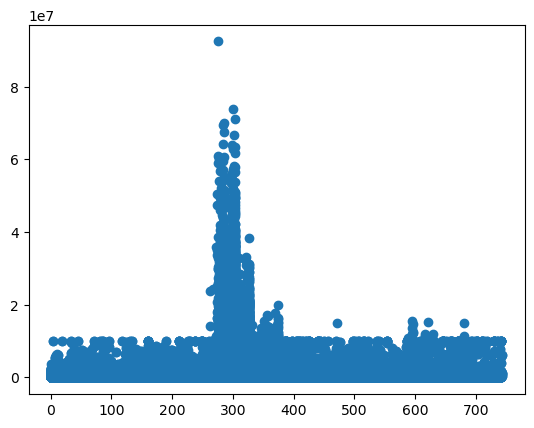

In [34]:
plt.scatter(data['step'],data['amount'])
plt.show()

In [10]:
# types of mode of transaction 
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
# amount transfered by each type of payment method
x=data.groupby('type').amount.sum()
x

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

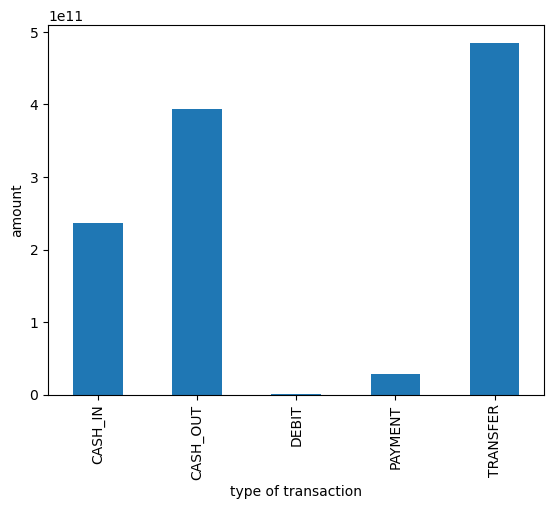

In [13]:
x.plot(kind='bar')
plt.xlabel('type of transaction')
plt.ylabel('amount')
plt.show()

# check no. of frauds 

In [14]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

here we can see that Fraud is only in transfer& cash out .. type of transaction

In [16]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

according to the applied model their are only 16 fraud cases but actually their are 8213 fraud cases

In [17]:
data[data.isFraud==1].type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

their are 4116 fraud cases in CASH_OUT & 
4097 fraud cases in TRANSFER 

soo now we work on these two columns

In [18]:
data_fraud=data[data.isFraud==1]

In [19]:
data_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Here we can see that the data of fraud transaction  & we can clearly see that the imbalance in the column(amount , 
                                                                                                         new balance, old 
                                                                                                         balance and in 
                                                                                                         the destination 
                                                                                                         sheet also)

In [20]:
# correlation b/w the columns

data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

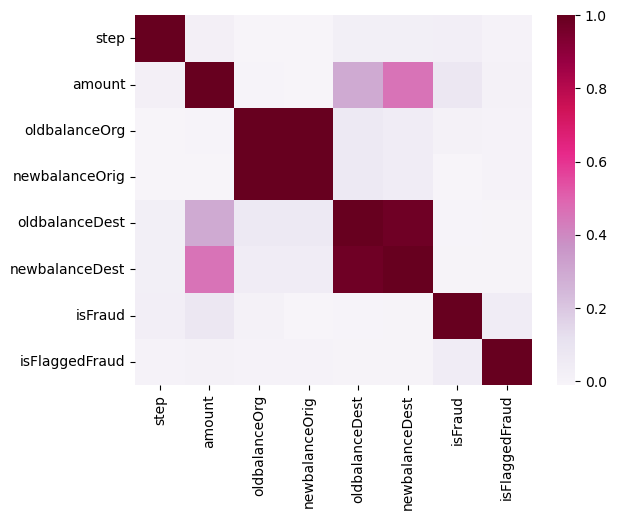

In [21]:
sns.heatmap(data.corr(),cmap='PuRd')

In [22]:
# seperate the data between fraud and not fraud  for better visualisation 

fraud=data[data.isFraud==1]
notfraud=data[data.isFraud==0]

In [23]:
print(fraud.shape)
print(notfraud.shape)

(8213, 11)
(6354407, 11)


In [24]:
# no of fraud identified by previous model in actually fraud transaction
flagged=fraud[fraud.isFlaggedFraud==1]
flagged.shape

(16, 11)

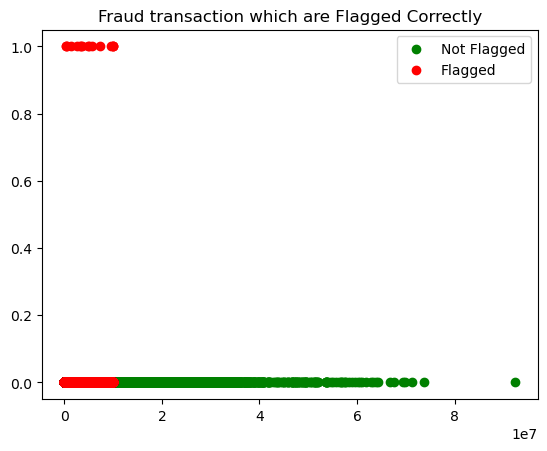

In [25]:
fig = plt.figure()

plt.title("Fraud transaction which are Flagged Correctly")
plt.scatter(notfraud['amount'],notfraud['isFlaggedFraud'],c='g')
plt.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [26]:
# pie chart of fraud data found by the system 

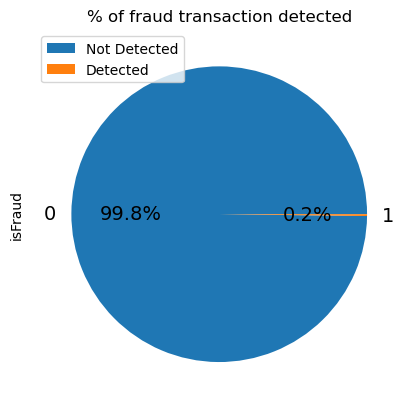

In [27]:
x = fraud.groupby(['isFlaggedFraud']).sum()
x.plot(kind='pie',y='isFraud',fontsize=14,shadow=False,autopct='%1.1f%%')
plt.title("% of fraud transaction detected")
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

only 0.2 percent of total fraud data is found correctly by system 

In [53]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

now we know that the only type CASH_OUT and type TRANSFER transactions can be fraudulent, and we can
thereforeremove the entries which have a different transaction type.

In [38]:
data = data.loc[~(data['type'].isin(['CASH_IN', 'DEBIT', 'PAYMENT']))]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [42]:
data[data.isFraud==1].value_counts().sum()

8213

CASH_OUT    0.501157
TRANSFER    0.498843
Name: type, dtype: float64


<AxesSubplot:ylabel='type'>

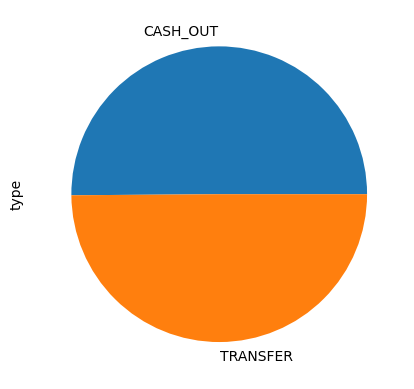

In [40]:
data_fraud=data[data.isFraud==1].type.value_counts(normalize=True)
print(data_fraud)
data_fraud.plot.pie()

As can be seen from the above chart and figures, isFraud = 1 transactions are almost equally distributed

In [47]:
# Now we will move on to checking the transactions where amount is zero

data_0_amount=data.loc[data['amount']==0]
print(data_0_amount[['type','isFraud']])
print(len(data_0_amount))

             type  isFraud
2736447  CASH_OUT        1
3247298  CASH_OUT        1
3760289  CASH_OUT        1
5563714  CASH_OUT        1
5996408  CASH_OUT        1
5996410  CASH_OUT        1
6168500  CASH_OUT        1
6205440  CASH_OUT        1
6266414  CASH_OUT        1
6281483  CASH_OUT        1
6281485  CASH_OUT        1
6296015  CASH_OUT        1
6351226  CASH_OUT        1
6362461  CASH_OUT        1
6362463  CASH_OUT        1
6362585  CASH_OUT        1
16


from the above data we can see that the 16 transaction all of them are in cash_out type are Fraud

In [48]:
# now we analyzing the originators and recipients balance where the balance is equal to zero .

In [51]:
round(len(data.loc[data['oldbalanceOrg'] == 0])*100/len(data),2)

47.23

around 48 percent of transaction from the originators side is 0

In [52]:
round(len(data.loc[data['newbalanceDest'] == 0])*100/len(data),2)

0.6

.6 percent of transaction in newbalance destination is zero

In [59]:
# check originators new balance 

In [58]:
data.loc[data['newbalanceOrig'] != data['oldbalanceOrg'] - data['amount']]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.0,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.0,64106.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.00,1,1
6362506,734,TRANSFER,10000000.00,C1891630790,11810044.85,1810044.85,C2124431731,0.0,0.00,1,0
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.00,1,0


In [57]:
round(len(data.loc[data['newbalanceOrig'] != data['oldbalanceOrg'] - data['amount']])*100/len(data), 2)

93.72

about 94 percent of originators balance are not correct

In [60]:
# check Recipients new balance 

In [61]:
round((len(data.loc[data['newbalanceDest'] != data['oldbalanceDest'] + data['amount']])*100/len(data)), 2)

42.09

about 94 percent of Recipients balance are not correct

In [71]:
# find is their any relationship between amount and isfraud

In [76]:
data.loc[data['isFraud']==0]['amount']

15         229133.94
19         215310.30
24         311685.89
42         110414.71
47          56953.90
             ...    
6362313    111963.72
6362317    317177.48
6362320    159188.22
6362321    186273.84
6362322     82096.45
Name: amount, Length: 2762196, dtype: float64

In [77]:
data.loc[data['isFraud']==1]['amount']

2              181.00
3              181.00
251           2806.00
252           2806.00
680          20128.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 8213, dtype: float64

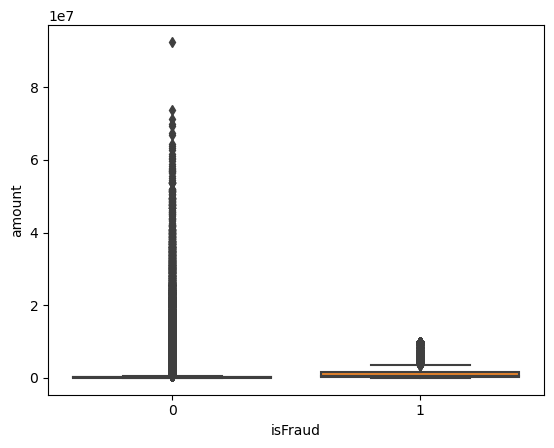

In [70]:
sns.boxplot(data=data,x='isFraud',y='amount')
plt.show()

We have already seen that there is a relationship between fraud transactions and amount = 0. We have also
seen that a high number of transactions have inaccurately collected initial and final balances.
Let us check these inaccuracies:

In [78]:
data['origBalance_inacc'] = (data['oldbalanceOrg'] - data['amount']) - data['newbalanceOrig']
data['destBalance_inacc'] = (data['oldbalanceDest'] + data['amount']) - data['newbalanceDest']

data[['origBalance_inacc', 'destBalance_inacc']]

,origBalance_inacc,destBalance_inacc
2,0.00,1.810000e+02
3,0.00,2.136300e+04
15,-213808.94,1.827035e+05
19,-214605.30,2.377353e+05
24,-300850.89,-2.401220e+06
...,...,...
6362615,0.00,0.000000e+00
6362616,0.00,6.311409e+06
6362617,0.00,1.000000e-02
6362618,0.00,8.500025e+05


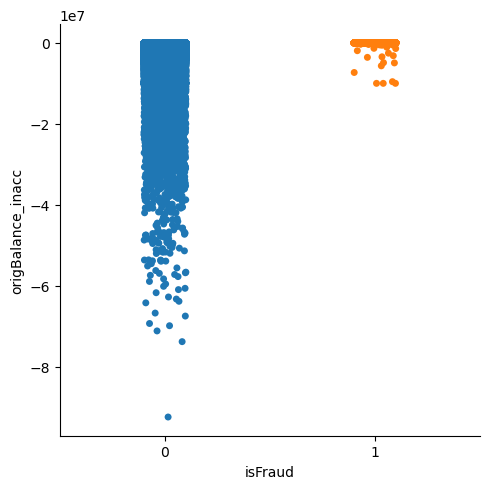

In [84]:
sns.catplot(data=data, x = 'isFraud', y = 'origBalance_inacc')

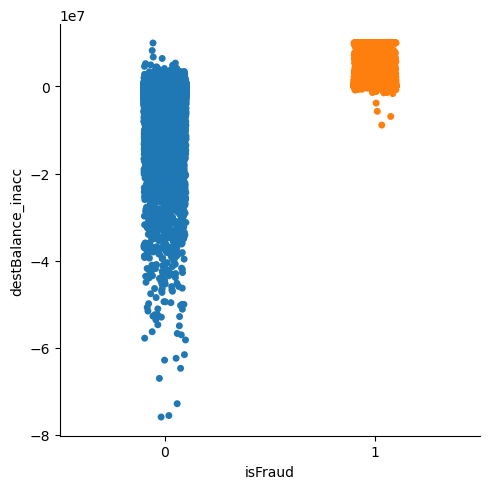

In [85]:
sns.catplot(data=data, x = 'isFraud', y = 'destBalance_inacc')

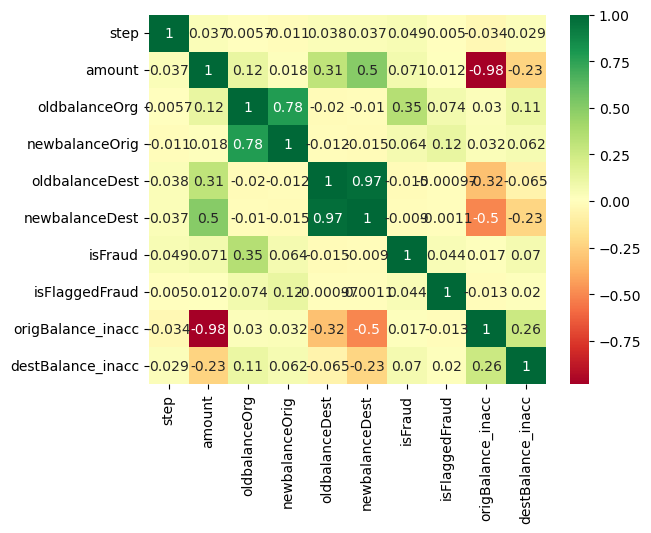

In [87]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [89]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,-213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,-214605.30,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,-300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0.00,8.500025e+05


# Data Preprocessing

In [88]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'origBalance_inacc', 'destBalance_inacc'],
      dtype='object')

In [90]:
data.drop(['nameOrig','nameDest','newbalanceOrig','newbalanceDest','isFlaggedFraud'],axis=1,inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   oldbalanceOrg      float64
 4   oldbalanceDest     float64
 5   isFraud            int64  
 6   origBalance_inacc  float64
 7   destBalance_inacc  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 190.2+ MB


In [94]:
# use one hot encoder on type column

In [95]:
data=pd.get_dummies(data,columns=['type'],prefix=['type'])

In [97]:
data.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,1,0.00,181.0,0,1
3,1,181.00,181.0,21182.0,1,0.00,21363.0,1,0
15,1,229133.94,15325.0,5083.0,0,-213808.94,182703.5,1,0
19,1,215310.30,705.0,22425.0,0,-214605.30,237735.3,0,1
24,1,311685.89,10835.0,6267.0,0,-300850.89,-2401220.0,0,1


In [98]:
X = data.drop(columns='isFraud')
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ML models

In [110]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [109]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae , rmse , r2_square

In [112]:
models = {
    "logistic regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "random forest classifier" : RandomForestClassifier(),
    "naive_bayes" : GaussianNB()
}  


model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


logistic regression
Model performance for Training set
- Root Mean Squared Error: 0.0556
- Mean Absolute Error: 0.0031
- R2 Score: -0.0429
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0552
- Mean Absolute Error: 0.0030
- R2 Score: -0.0380


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0265
- Mean Absolute Error: 0.0007
- R2 Score: 0.7611


random forest classifier
Model performance for Training set
- Root Mean Squared Error: 0.0007
- Mean Absolute Error: 0.0000
- R2 Score: 0.9998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0256
- Mean Absolute Error: 0.0007
- R2 Score: 0.7765


naive_bayes
Model performance for Training set
- Root Mean Squared Error: 0.0952
- Mean Absolute Error: 0.0091
- R2 Score: -2.0618
-

In [116]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,random forest classifier,0.776507
1,Decision Tree,0.761115
0,logistic regression,-0.038043
3,naive_bayes,-2.149222


# Logistic regression

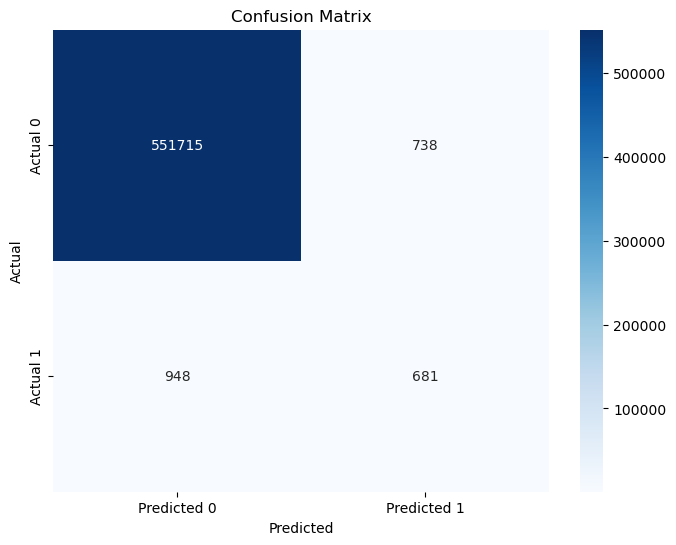

In [121]:


lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552453
           1       0.48      0.42      0.45      1629

    accuracy                           1.00    554082
   macro avg       0.74      0.71      0.72    554082
weighted avg       1.00      1.00      1.00    554082



In [127]:
print(y_test)


2388965    0
6282502    0
918224     0
1959628    0
1676844    0
          ..
60369      0
523764     0
5844603    0
5214459    0
4843749    0
Name: isFraud, Length: 554082, dtype: int64


In [131]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# random forest classifier

In [138]:
rf = RandomForestClassifier()

rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

y_pred = rf_model.predict(X_test)




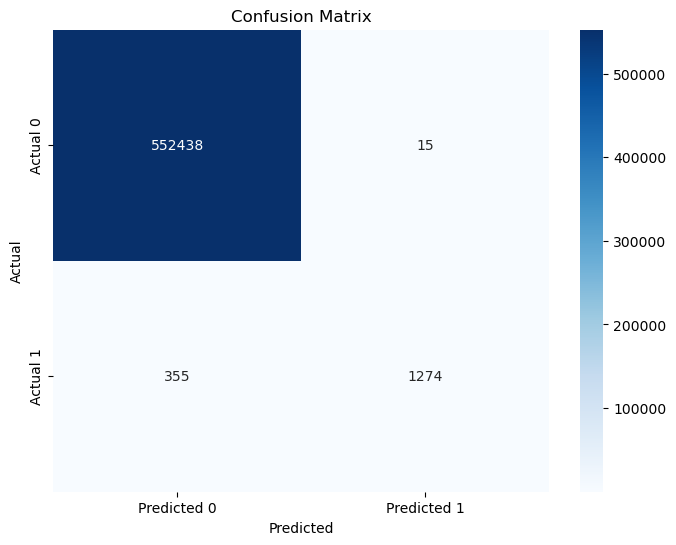

In [141]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

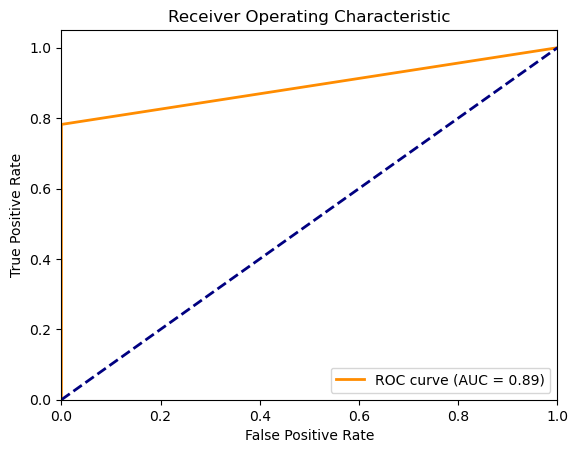

In [142]:
# Assuming you have true labels (y_true) and predicted probabilities (y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552453
           1       0.99      0.78      0.87      1629

    accuracy                           1.00    554082
   macro avg       0.99      0.89      0.94    554082
weighted avg       1.00      1.00      1.00    554082



# Naive bayes

In [149]:
# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict class labels for the test data
y_pred = model.predict(X_test)



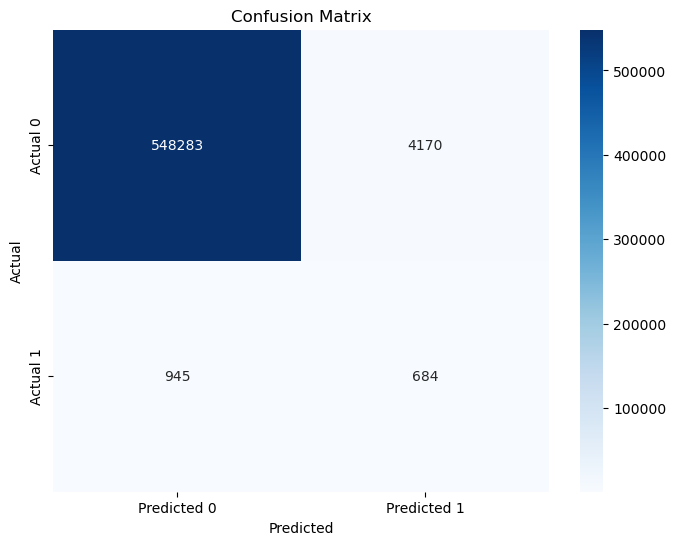

In [150]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552453
           1       0.14      0.42      0.21      1629

    accuracy                           0.99    554082
   macro avg       0.57      0.71      0.60    554082
weighted avg       1.00      0.99      0.99    554082



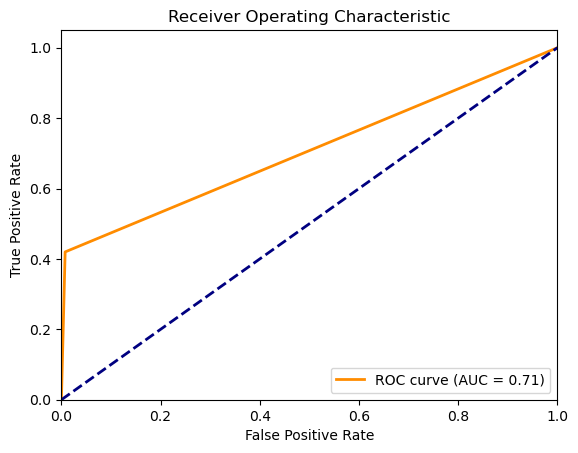

In [152]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [157]:
combined_result=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
combined_result

,y_test,y_pred
2388965,0,0
6282502,0,0
918224,0,0
1959628,0,0
1676844,0,0
...,...,...
60369,0,0
523764,0,0
5844603,0,0
5214459,0,0


# conclusion

In [158]:
data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud',
       'origBalance_inacc', 'destBalance_inacc', 'type_CASH_OUT',
       'type_TRANSFER'],
      dtype='object')

Que1 --  Describe your fraud detection model in elaboration.

Ans1 --- 

1. Splitting data

2. The following linear algorithms will be used, namely:
    a. Logistic regression
    b. random forest classifier
    c. naive bayes classifier

3. Conclusion


Que2-- How did you select variables to be included in the model

Ans2-- variables to be selected on the basis of correlation . As we see that the relation between the columns(oldbalanceOrg,
                                                                                                             oldbalanceDest)
are highly correlated and the 'isFraud' is highly dependently on other independtent variables

Que3-- What are the key factors that predict fraudulent customer?

Ans3 --
1. Transaction Behavior:

2. If there is no evidence that the transaction is taking place, then there may be doubts about this as well.

3. If the background is not available by verifying whether the transaction has been given digital or paper proof, they may be fraudulent customer.

4. Customer Activities: login patterns, multiple failed login attempts, frequent changes to personal information, or suspicious account updates.
    
5. History of Crime

6. Payment Information

7. Anomaly Detection:


Que4-- Do these factors make sense? If yes, How? If not, How not?

Ans4--
Yes, these factors make sense of predicting fraudulent customers.

1. In an account that has been inactive for a long time, if suddenly there is an excessive amount of transaction or limited money continues to be credited.


2. If there is no evidence that the transaction is taking place, then there may be doubts about this as well.

3. If the background is not available by verifying whether the transaction has been given digital or paper proof, they may be fraudulent customer.

4. Customer Activities: login patterns, multiple failed login attempts, frequent changes to personal information, or suspicious account updates.

5. Historical fraud patterns includes identifying specific transaction types or product categories that are frequently associated with fraud, as well as common patterns in the timing or sequencing of fraudulent activities.

6. Unusual payment methods, frequent changes in payment details, multiple accounts associated with the same payment information, or transactions involving stolen or compromised credit card information.

7. Leveraging anomaly detection techniques can help identify outliers or unusual patterns in customer behavior. Unusual purchase patterns, unexpected changes in spending habits, or abnormal transaction sequences can be identified using anomaly detection techniques.

Que5-- What kind of prevention should be adopted while company update its infrastructure?

Ans--
1. Security: Ensure that security is a fundamental aspect of the architecture, including network design, access controls, data storage, and encryption.


2. Access Control and Authentication: This includes the use of strong passwords and limit access.

3. Network: Separating systems and services based on their security requirements, you can minimize the lateral movement of attackers within the network.

4. Encryption and Protection: These are sensitive data. Need to properly encrypted in transit. Strong encryption algorithms and protocols to protect data from unauthorized access. We can use Machine Learning Algorithm to monitor and prevent the unauthorized transmission of sensitive data.

5. Monitoring and Logging: Monitoring and logging solutions to capture and analyze system logs, network traffic, and security events.

6. Education and Awareness: Conduct regular training programs to educate employees about security best practices, such as identifying phishing emails, avoiding suspicious websites, and using secure communication channels.

7. Incident Response: An incident response plan that outlines the steps to be taken in the event of a security incident.

8. Disaster Recovery: Backup and disaster recovery mechanisms to ensure business continuity in case of infrastructure failures or security breaches.


9. Third-Party Risk Management: Evaluate the security practices and policies of third-party vendors or service providers involved in the infrastructure update.

10. Compliance and Regulatory Considerations: Ensure that the updated infrastructure adheres to relevant industry regulations and compliance standards, Consider privacy requirements and implement necessary controls to protect personal data.

Que6-- Assuming these actions have been implemented, how would you determine if they work?

Ans--
Security Audits: Conduct periodic security audits to evaluate the implemented security controls and measures. Engage internal or external security experts to review the infrastructure, conduct vulnerability assessments, penetration testing, and analyze the overall security posture.

Incident Response and Monitoring: Monitor security incidents and responses is an effectiveness of preventive measures. Such as unauthorized access attempts, data breaches.

User Feedback and Awareness: Seek feedback from employees, system administrators, and users regarding their experience with the updated infrastructure and security measures. Conduct surveys, interviews, or feedback sessions to gather insights into their perception of the security measures and whether they feel more confident in the system's security.

Compliance and Audit Reports: Review compliance reports and audit findings to evaluate adherence to relevant industry regulations and standards.

Continuous Monitoring: Implement continuous monitoring of the infrastructure, including real-time log analysis, network traffic monitoring, and threat intelligence feeds.

Lessons Learned and Improvement Actions: Regularly conduct lessons learned sessions or post-incident reviews to identify areas for improvement. Use this information to refine security controls, update policies and procedures, and implement necessary improvements.

By employing these evaluation methods, you can gain insights into the effectiveness of the implemented security measures. It is important to have a proactive and continuous approach to security evaluation, ensuring that preventive measures are regularly reviewed, adjusted, and enhanced to address emerging threats and evolving security challenges.